### Start

In [4]:
# General definitions
%run '../definitions.ipynb'
%run '../treemakers.ipynb'
%run '../Analysis_class.ipynb'

# plt.style.use('latex_prl')
# def plt_savefig(filename, folder='plots'):
#     plt.savefig(os.path.join(folder, filename + '.pdf'))

In [5]:
processed_data_path = '/data/xenon/xams/run8/processed_v2_medium/'
minitree_path = '/data/xenon/xams/run8/minitrees/'


In [6]:
# Long runs limited to 6 hours because of S2 decrease.
run_names_ambe_1 = get_run_list(processed_data_path, '170321_155957', '170321_214847') # Last file: 170322_081037
run_names_ambe_2 = get_run_list(processed_data_path, '170322_154130', '170322_213020') # Last file: 170322_233141
run_names_bg     = get_run_list(processed_data_path, '170323_175029', '170323_232220') # Last file: 170324_072500
run_names_cs     = get_run_list(processed_data_path, '170323_144804', '170323_151843') # 
# UNPROCESSED FILES AS OF AUGUST 30, 2017
# run_names_ambe_0 = get_run_list(processed_data_path, '170320_160942', '170320_160942') # Just one file, half hour
# run_names_na_0   = get_run_list(processed_data_path, '170323_121631', '170323_134830') # DAQ crashes in here
# run_names_na_1   = get_run_list(processed_data_path, '170323_140425', '170323_142831') # 

Run list contains 24 files
Run list contains 24 files
Run list contains 12 files
Run list contains 5 files


In [27]:
x = XAMSAnalysis(run_names_ambe_2, processed_data_path, minitree_path)
# x.load()

In [28]:
x.load(verbose=True, treemakers = ['Fundamentals', 'Basics'])

Loaded 2289266 (2289.3 k) events.
Total live time: 21598.0 seconds (6.0 hours)


### Corrections

In [29]:
# Position correction
x.corr_z(1.5, 1.73)
x.corr_s1_ly_poly(ly_filename='../light_yield/data/cs137_ly_p2_sel2.pickle')
x.corr_s2_electron_lifetime(pickle_file='../light_yield/data/cs137_electron_lifetime_sel2.pickle', verbose=True)

Using lifetime 810.658412


### Cuts

In [30]:
x.cut_interaction_exists()

Finite s1 selection: 922219 rows removed (59.72% passed)


In [31]:
x.cut_time_since_previous()

ms_since_previous_event above 1.0 selection: 217200 rows removed (84.11% passed)


In [32]:
x.cut_fiducial_volume()

z in [-9.5, -0.5) selection: 189209 rows removed (83.54% passed)


In [33]:
x.cut_s2_range_50p_area(pickle_file='../light_yield/data/cs137_s2_width.pickle')

Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 29651 rows removed (96.91% passed)


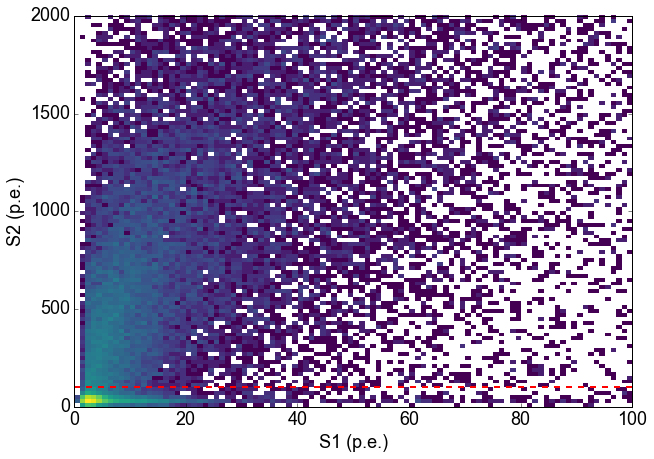

s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 100.0 selection: 21234 rows removed (97.72% passed)


In [34]:
x.cut_thresholds(s1_threshold=0, s2_threshold=100., plot=True, apply=True, bins=100, 
                 norm=LogNorm(), range=((0, 100), (0, 2e3)))

largest_other_s1 below 2 selection: 271389 rows removed (70.17% passed)


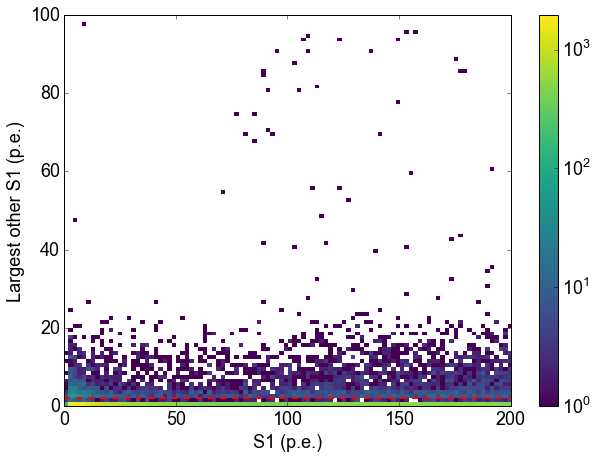

In [35]:
x.cut_largest_other_s1(plot=True, apply=True,largest_other_s1_max=2, bins=100, norm=LogNorm(), range=((0, 200), (0, 100)))
plt.colorbar()
plt.show()

largest_other_s2 below 100.0 selection: 131361 rows removed (79.42% passed)


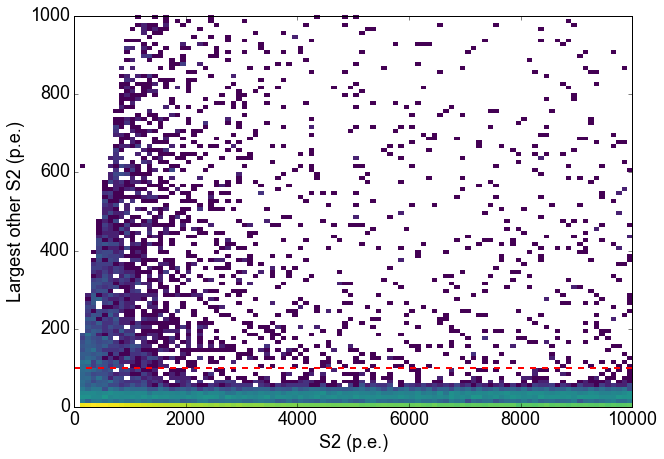

In [36]:
x.cut_largest_other_s2(plot=True, apply=True, bins=100, norm=LogNorm(), range=((0, 10e3), (0, 1e3)))

Note that you should take the acceptances with a grain of salt; the low-energy events seem to behave much better...

### S2 decrease

In [37]:
time_bin_edges = np.linspace(0, 3600 * 6, 2 * 6  + 1 )

In [39]:
for t_left, t_right in zip(time_bin_edges[:-1], time_bin_edges[1:]):
    _d = cuts.range_selection(x.d, 't', (t_left, t_right))
    plt.hist2d(_d['cs1'], _d['cs2'], bins=100, range=((0, 200), (0, 20e3)), norm=LogNorm(), vmax = 50)
    plt.colorbar()
    plt.xlabel('cS1 (p.e.)')
    plt.ylabel('cS2 (p.e.)')
    plt.title('t = %.2f hours' % (np.average([t_left, t_right]) /3600))
    plt.savefig('figs/cs1cs2_up_to_%d.png' % t_left)
    plt.close()

t in [0.0, 1800.0) selection: 475643 rows removed (6.19% passed)
t in [1800.0, 3600.0) selection: 474146 rows removed (6.48% passed)
t in [3600.0, 5400.0) selection: 472023 rows removed (6.90% passed)
t in [5400.0, 7200.0) selection: 470561 rows removed (7.19% passed)
t in [7200.0, 9000.0) selection: 468581 rows removed (7.58% passed)
t in [9000.0, 10800.0) selection: 466714 rows removed (7.95% passed)
t in [10800.0, 12600.0) selection: 464151 rows removed (8.45% passed)
t in [12600.0, 14400.0) selection: 462390 rows removed (8.80% passed)
t in [14400.0, 16200.0) selection: 459739 rows removed (9.32% passed)
t in [16200.0, 18000.0) selection: 458141 rows removed (9.64% passed)
t in [18000.0, 19800.0) selection: 457014 rows removed (9.86% passed)
t in [19800.0, 21600.0) selection: 454623 rows removed (10.33% passed)


In [24]:
# popt = [  2.12374448e+04,  -6.19573325e-01]
# x_plot=  time_bin_edges
# plt.plot(x_plot, lin(x_plot, *popt))

# x.corr_s2_sag(plot=True, apply=False, time_bins=50,cs2_cutoff=0, bins=100, norm=LogNorm(), range=((0, 30e3), (0, 40e3)))
# plt.legend()

# plt.show()

t in [0.0, 3600.0) selection: 442786 rows removed (12.67% passed)
cs1 in [175, 225) selection: 62490 rows removed (2.69% passed)


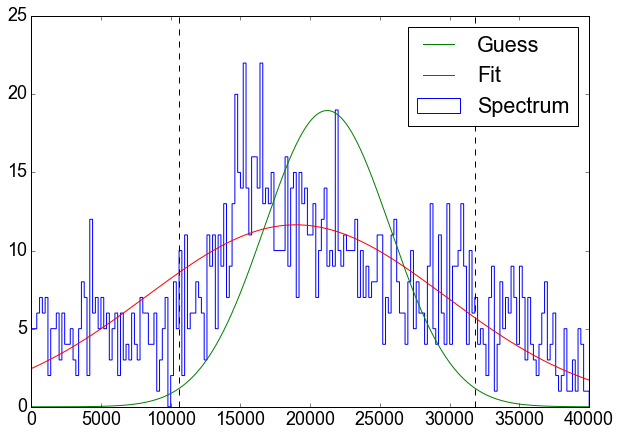

t in [3600.0, 7200.0) selection: 435581 rows removed (14.09% passed)
cs1 in [175, 225) selection: 69676 rows removed (2.44% passed)


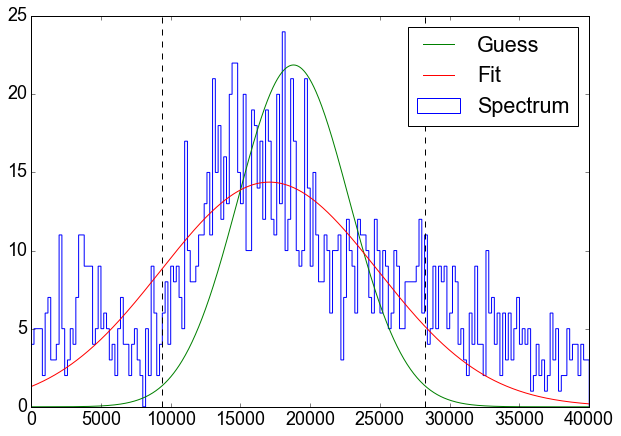

t in [7200.0, 10800.0) selection: 428292 rows removed (15.52% passed)
cs1 in [175, 225) selection: 76810 rows removed (2.42% passed)


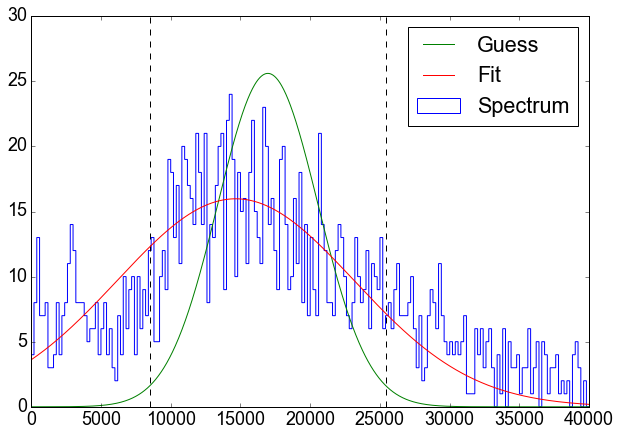

t in [10800.0, 14400.0) selection: 419538 rows removed (17.25% passed)
cs1 in [175, 225) selection: 85536 rows removed (2.21% passed)


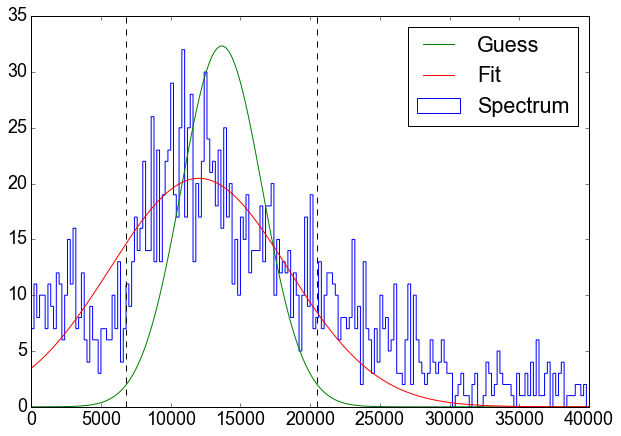

t in [14400.0, 18000.0) selection: 410877 rows removed (18.96% passed)
cs1 in [175, 225) selection: 94208 rows removed (2.00% passed)


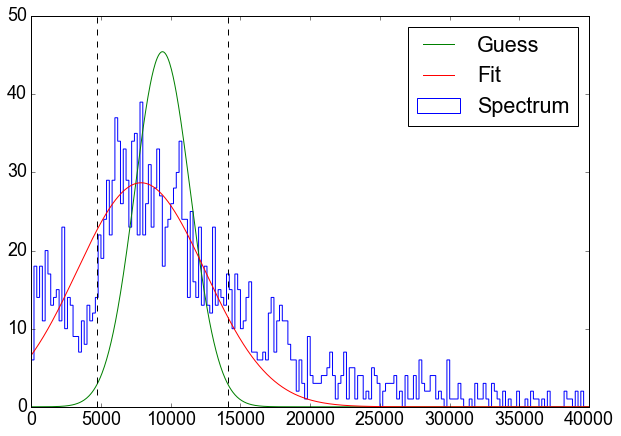

t in [18000.0, 21600.0) selection: 404634 rows removed (20.19% passed)
cs1 in [175, 225) selection: 100399 rows removed (1.92% passed)


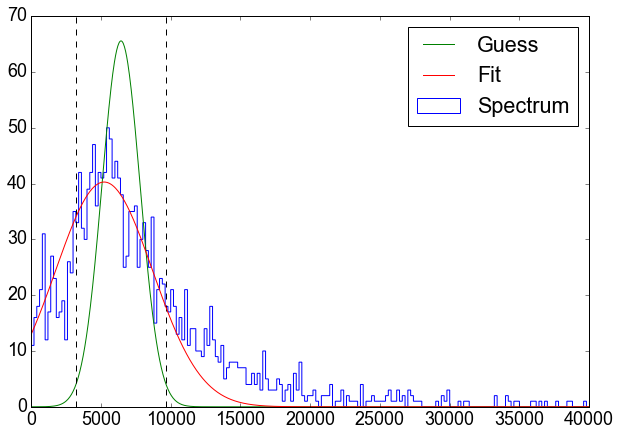

(0, 22000.0)

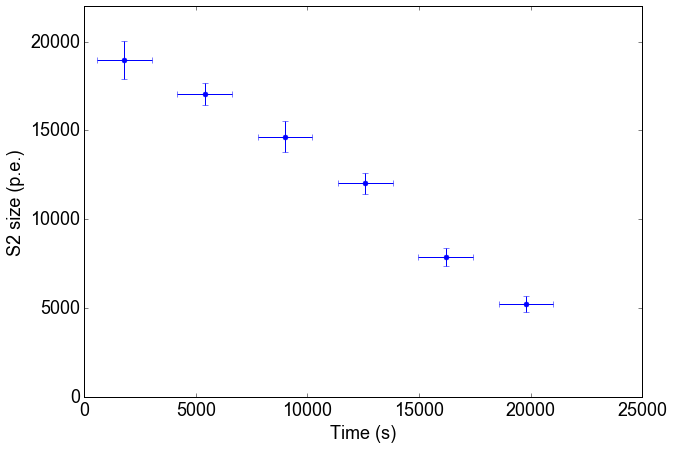

In [40]:
# Settings
n_time_bins = 6
cs1_range = (175, 225)


time_bin_edges = np.linspace(0, 3600 * 6, n_time_bins  + 1 )
time_bins = 0.5 * (time_bin_edges[:-1] + time_bin_edges[1:])
time_err = 0.34 * 3600 * 6 / n_time_bins * np.ones(len(time_bins))
fit_params = []
for t_left, t_right in zip(time_bin_edges[:-1], time_bin_edges[1:]):
    _d = cuts.range_selection(x.d, 't', (t_left, t_right))
    _d = cuts.range_selection(_d, 'cs1', cs1_range)
    # plt.hist(_d['cs2'], bins=40, range=(0, 40e3), histtype='step')
    median = np.median(_d['cs2'])
    popt, m, norm  = fit_gaus(_d['cs2'].values, (0.5*median, 1.5*median), 
                              median, 0.3*median, int_step=5, plot_range=(0, 40e3), plot=True, print_level=0)
    fit_params.append(popt + [m.errors['mu'], m.errors['sigma']])
    plt.show()
fit_params = np.array(fit_params)
plt.errorbar(x=time_bins, y = fit_params[:,0], yerr = fit_params[:, 2], 
             xerr = time_err, ls='None', marker='.', markersize=10)
plt.xlabel('Time (s)')
plt.ylabel('S2 size (p.e.)')
plt.ylim(0)

(0, 22000.0)

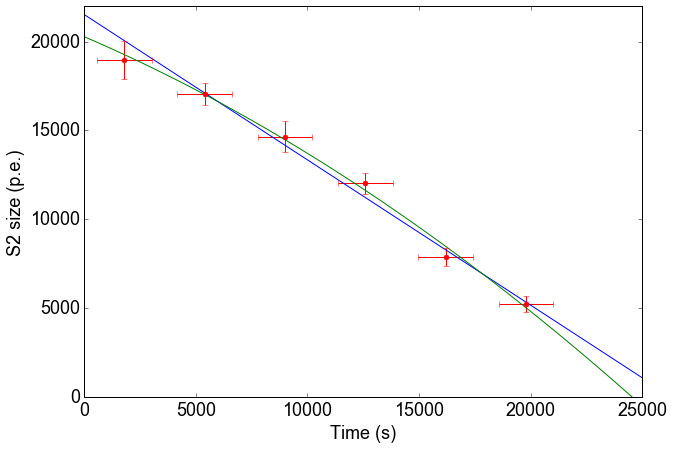

In [43]:
def lin(x, a0, a1):
    return a0 + a1 * x

def p2(x, a0, a1, a2):
    return a0 + a1 * x + a2 * x**2

popt, pcov = scipy.optimize.curve_fit(lin, time_bins, fit_params[:,0], p0=[22e3, -0.5], sigma=fit_params[:, 2])
popt2, pcov2 = scipy.optimize.curve_fit(p2, time_bins, fit_params[:,0], p0=[22e3, -0.5, -0.001], sigma=fit_params[:, 2])

x_plot = np.linspace(0, 25e3)
plt.plot(x_plot, lin(x_plot, *popt))
plt.plot(x_plot, p2(x_plot, *popt2))


plt.errorbar(x=time_bins, y = fit_params[:,0], yerr = fit_params[:, 2], 
             xerr = time_err, ls='None', marker='.', markersize=10)
plt.xlabel('Time (s)')
plt.ylabel('S2 size (p.e.)')
plt.ylim(0, 22e3)


In [45]:
popt2

array([  2.02821150e+04,  -5.40122486e-01,  -1.16721434e-05])

#### BG data

### Resulting spectrum

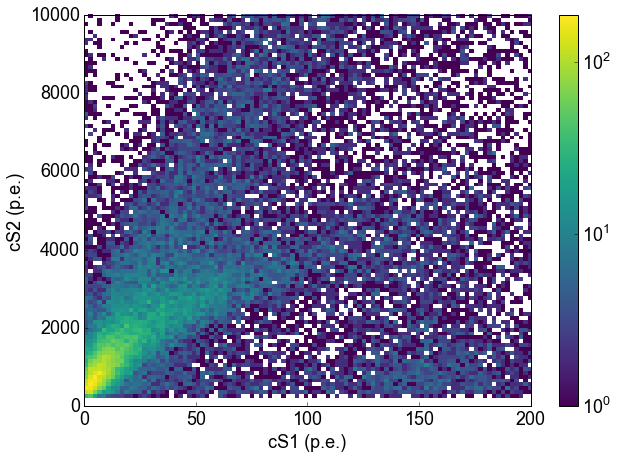

In [119]:
x.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200), (0, 10e3)))
plt.colorbar()
plt.show()

### Is the below the band population neutron-X?

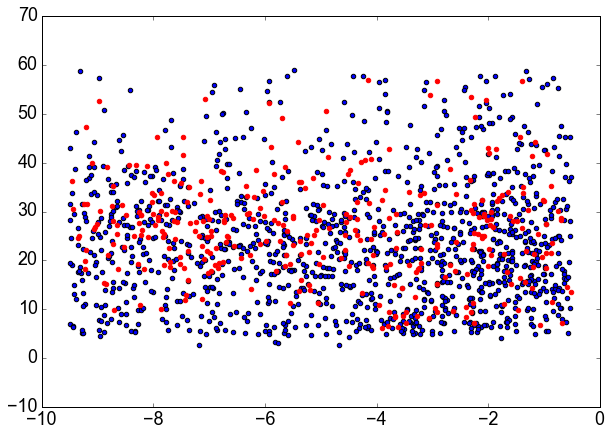

In [25]:
plt.scatter(nr['z'], nr['s1_range_50p_area'])
plt.scatter(below['z'], below['s1_range_50p_area'], color='red')

### Compressed version

In [82]:
def read_etc(run_names, processed_data_path, minitree_path, treemakers = None):
    x = XAMSAnalysis(run_names, processed_data_path, minitree_path)
    x.load(treemakers=  treemakers)
    x.corr_z(1.5, 1.73)

    x.cut_interaction_exists()
    x.cut_time_since_previous()
    x.cut_fiducial_volume()
    x.cut_s2_range_50p_area(pickle_file='../light_yield/data/cs137_s2_width.pickle')
    x.cut_thresholds(s1_threshold=0, s2_threshold=200.)
    x.cut_largest_other_s1()
    x.cut_largest_other_s2() 
    x.corr_s1_ly_poly(ly_filename='../light_yield/data/cs137_ly_p2_sel2.pickle')
    x.corr_s2_electron_lifetime(pickle_file='../light_yield/data/cs137_electron_lifetime_sel2.pickle', verbose=True)
    print('Events left: %.1f k' % (len(x.d)/1000))
    return x

In [120]:
n_hours = 6

In [121]:
nr = read_etc(run_names_nr[:n_hours * 4], processed_data_path_nr, minitree_path, treemakers = ['Fundamentals', 'Basics'])
er = read_etc(run_names_er, processed_data_path_er, minitree_path, treemakers = ['Fundamentals', 'Basics'])
bg = read_etc(run_names_bg[:n_hours * 2], processed_data_path_bg, minitree_path, treemakers = ['Fundamentals', 'Basics'])

Loaded 1828149 (1828.1 k) events.
Total live time: 21598.4 seconds (6.0 hours)
Finite s1 selection: 481671 rows removed (73.65% passed)
ms_since_previous_event above 1.0 selection: 167068 rows removed (87.59% passed)
z in [-9.5, -0.5) selection: 194772 rows removed (83.49% passed)
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 31439 rows removed (96.81% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 200.0 selection: 36336 rows removed (96.19% passed)
largest_other_s1 below 5 selection: 199966 rows removed (78.19% passed)
largest_other_s2 below 100.0 selection: 162636 rows removed (77.31% passed)
Using lifetime 810.658412
Events left: 554.3 k
Loaded 282549 (282.5 k) events.
Total live time: 1201.4 seconds (0.3 hours)
Finite s1 selection: 68434 rows removed (75.78% passed)
ms_since_previous_event above 1.0 selection: 55747 rows removed (73.96% passed)
z in [-9.5, -0.5) selection: 27664 rows removed (82.53% passed)
Cutoff at 251.5 ns
s2_width_differe

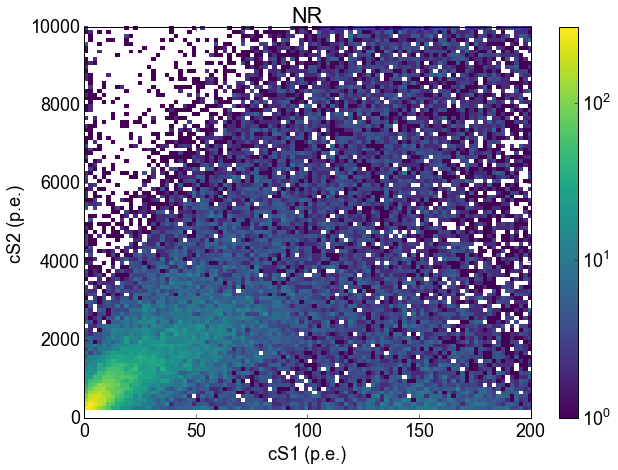

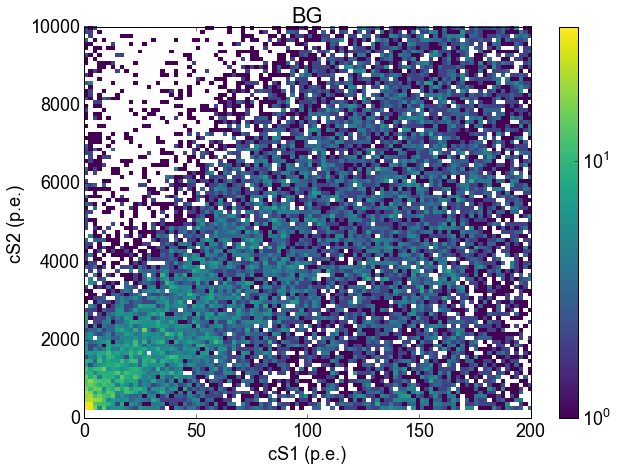

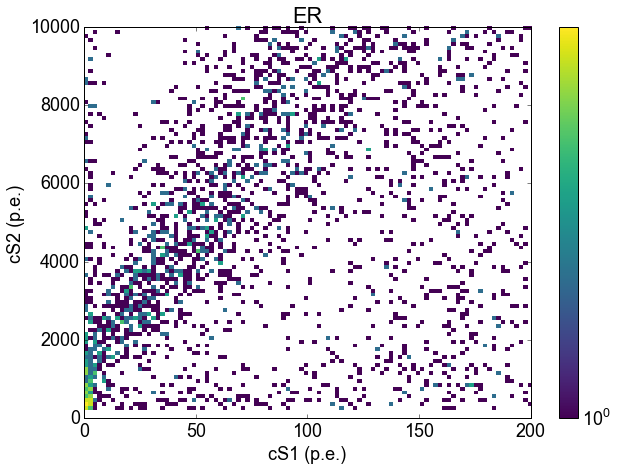

In [122]:
nr.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 10e3)))
plt.colorbar()
plt.title('NR')
plt.show()

bg.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 10e3)))
plt.colorbar()
plt.title('BG')
plt.show()


er.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 10e3)))
plt.colorbar()
plt.title('ER')
plt.show()

### Correction... S2 decrease

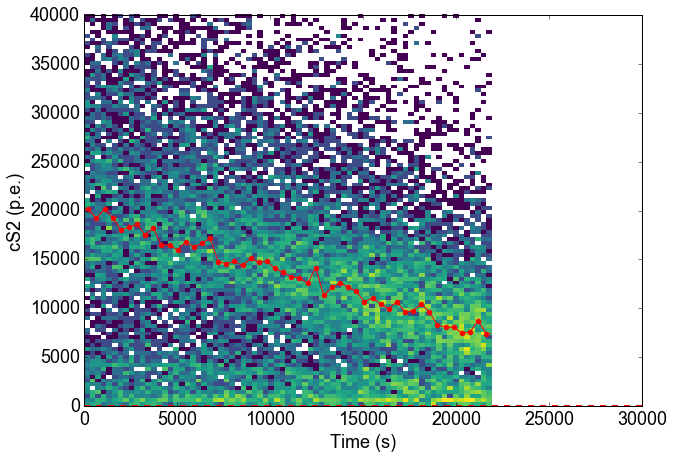

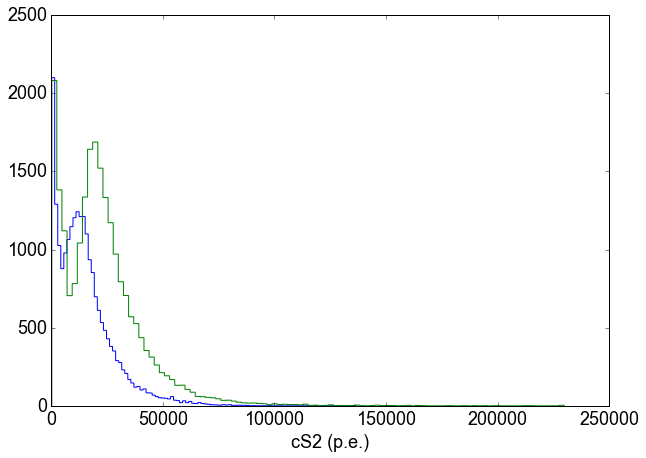

In [126]:
_, _ = nr.corr_s2_sag(plot=True, apply=True, time_bins=50,cs2_cutoff=0, bins=100, norm=LogNorm(), range=((0, 30e3), (0, 40e3)))

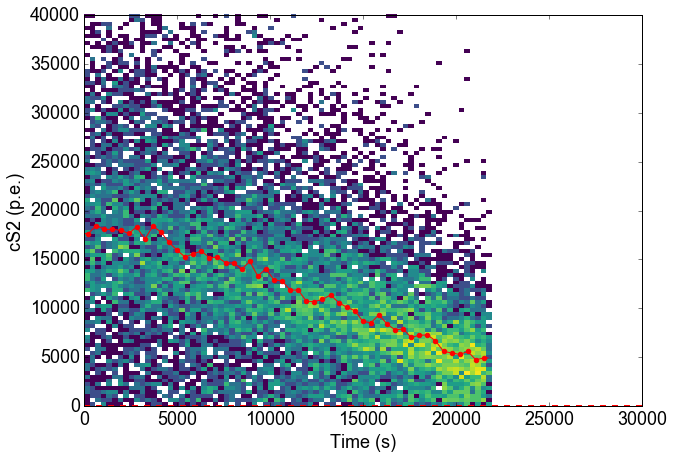

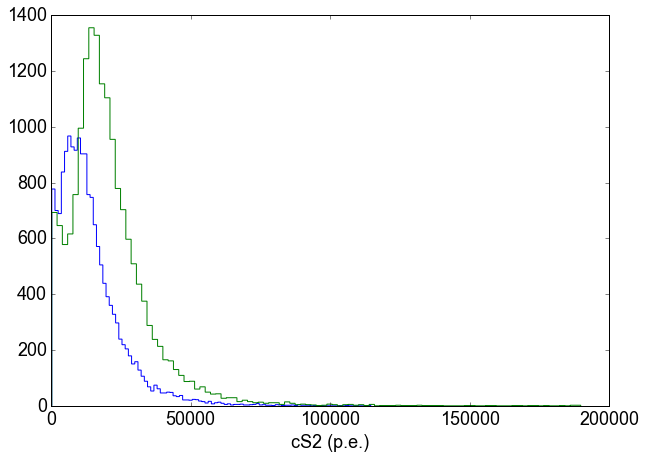

In [127]:
_, _ = bg.corr_s2_sag(plot=True, apply=True, time_bins=50,cs2_cutoff=0, bins=100, norm=LogNorm(), range=((0, 30e3), (0, 40e3)))

### Compare results

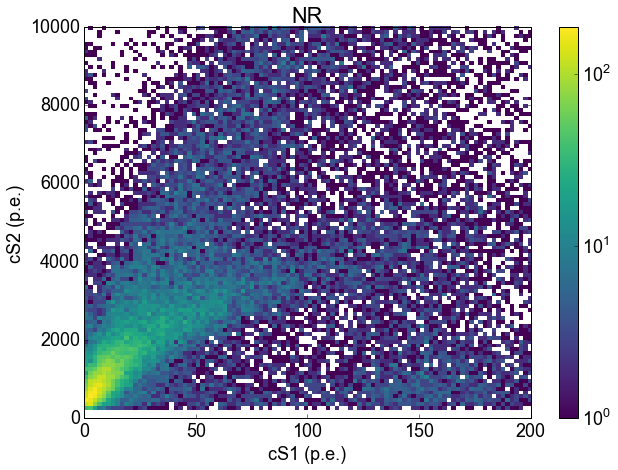

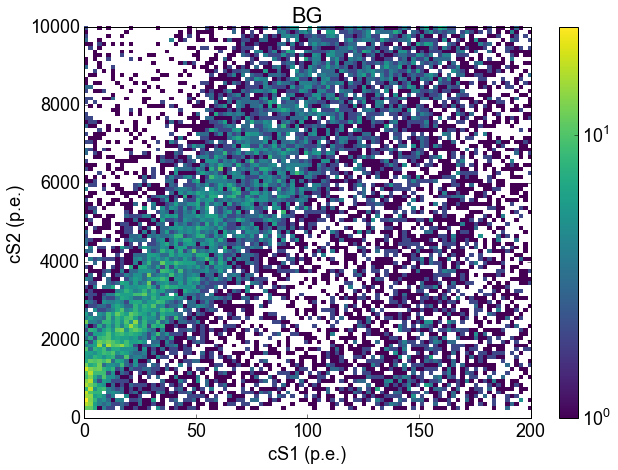

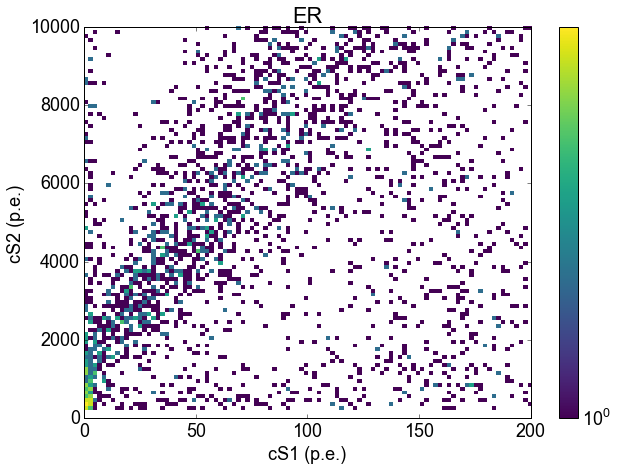

In [128]:
nr.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 10e3)))
plt.colorbar()
plt.title('NR')
plt.show()

bg.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 10e3)))
plt.colorbar()
plt.title('BG')
plt.show()


er.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 10e3)))
plt.colorbar()
plt.title('ER')
plt.show()

### Ad-hoc band selection

#### NR

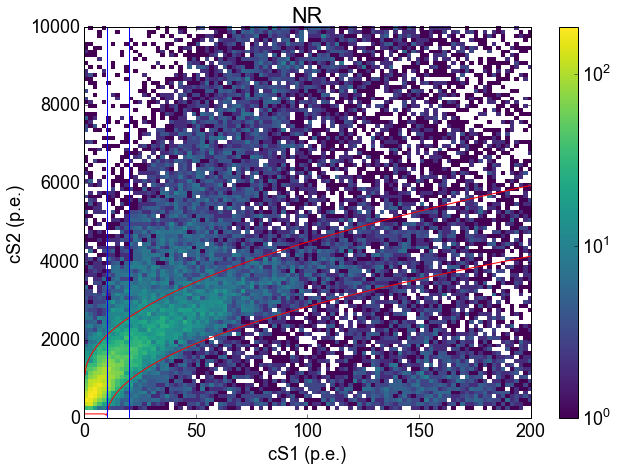

In [135]:
nr.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 10e3)))
plt.colorbar()
plt.title('NR')

# Function definitions
def nr_low(s1):
    # Piecewise def
    return np.array([300*np.sqrt(_s1 - 10) + 0  if _s1>10 else 100 for _s1 in s1])

def nr_high(s1):
    return 350*np.sqrt(s1 - 0) + 1000

x_plot = np.linspace(0, 200, 200)
plt.plot(x_plot, nr_high(x_plot), color='red')
plt.plot(x_plot, nr_low(x_plot),  color='red')
plt.axvline(10)
plt.axvline(20)
plt.show()


In [136]:
d_nr = nr.d
# select below line
d_nr = cuts.selection(d_nr, d_nr['cs2'] < nr_high(d_nr['cs1']), 'Below NR' )
d_nr = cuts.selection(d_nr, d_nr['cs2'] > nr_low(d_nr['cs1']), 'Above NR' )
d_nr = cuts.below(d_nr, 'cs1', 200)

Below NR selection: 512322 rows removed (7.57% passed)
Above NR selection: 20358 rows removed (51.46% passed)
cs1 below 200 selection: 3865 rows removed (82.09% passed)


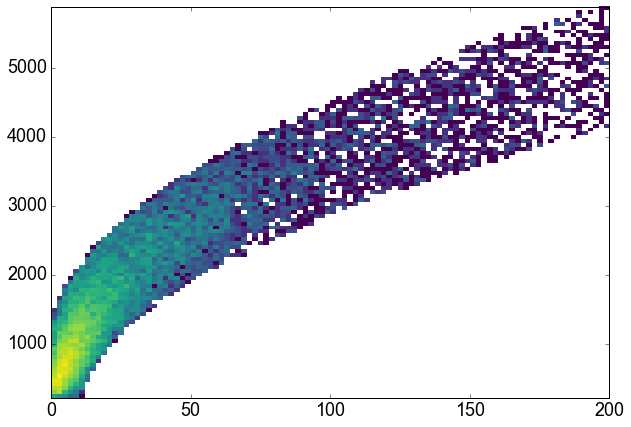

In [137]:
plt.hist2d(d_nr['cs1'], d_nr['cs2'], bins=100, norm=LogNorm())
plt.show()

#### ER

In [138]:
# For now BG, since it is higher stats...

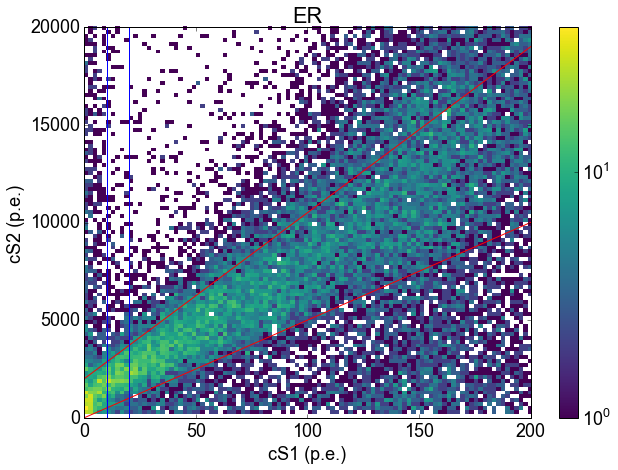

In [143]:
bg.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 20e3)))
plt.colorbar()
plt.title('ER')

# Function definitions
def er_low(s1):
    # Piecewise def
    return 50 * s1 + 0

def er_high(s1):
    return 85 * s1 + 2e3

x_plot = np.linspace(0, 200, 200)
plt.plot(x_plot, er_high(x_plot), color='red')
plt.plot(x_plot, er_low(x_plot),  color='red')
plt.axvline(10)
plt.axvline(20)
plt.show()


In [144]:
d_er = bg.d
# select below line
d_er = cuts.selection(d_er, d_er['cs2'] < er_high(d_er['cs1']), 'Below ER' )
d_er = cuts.selection(d_er, d_er['cs2'] > er_low(d_er['cs1']), 'Above ER' )
d_er = cuts.below(d_er, 'cs1', 200)

Below ER selection: 341234 rows removed (27.17% passed)
Above ER selection: 34880 rows removed (72.61% passed)
cs1 below 200 selection: 78293 rows removed (15.31% passed)


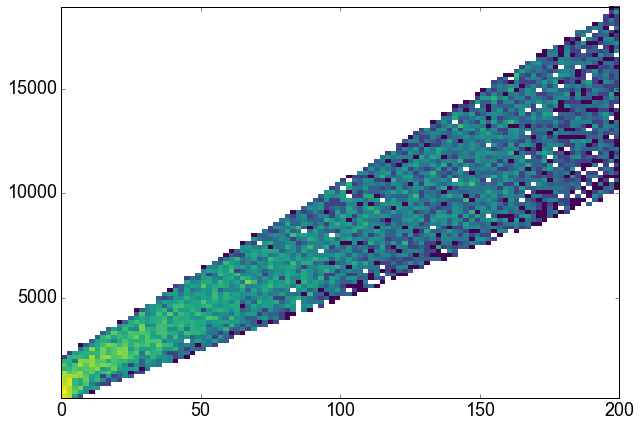

In [145]:
plt.hist2d(d_er['cs1'], d_er['cs2'], bins=100, norm=LogNorm())
plt.show()

### Some shape properties of the S1...

In [148]:
bin_nr = d_nr[(d_nr['cs1'] > 10) & (d_nr['cs1'] < 20)]
bin_er = d_er[(d_er['cs1'] > 10) & (d_er['cs1'] < 20)]

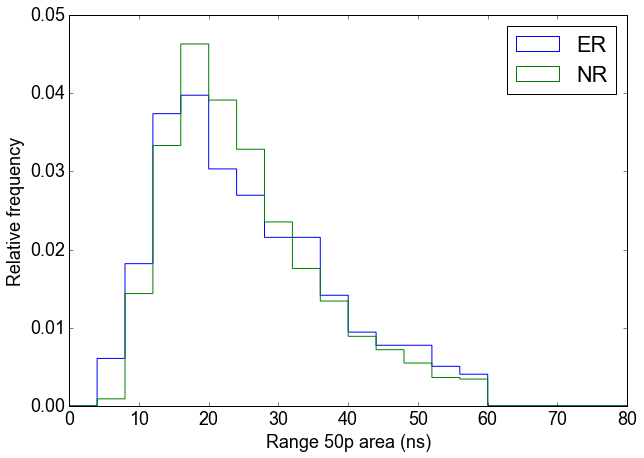

In [149]:
plt.hist(bin_er['s1_range_50p_area'], bins=20, range=(0, 80), histtype='step', label='ER', normed=True)
plt.hist(bin_nr['s1_range_50p_area'], bins=20, range=(0, 80), histtype='step', label='NR', normed=True)
plt.legend()
plt.xlabel('Range 50p area (ns)')
plt.ylabel('Relative frequency')
plt.show()

### Read S1Pulse minitree

In [3]:
x  = XAMSAnalysis(run_names_nr[:1], processed_data_path_nr, minitree_path)
x.load(treemakers=['Basics', 'Fundamentals', S1Pulse])

x.corr_z(1.5, 1.73)
x.cut_interaction_exists()
x.cut_time_since_previous()
x.cut_fiducial_volume()
x.cut_s2_range_50p_area(pickle_file='../light_yield/data/cs137_s2_width.pickle')
x.cut_thresholds(s1_threshold=0, s2_threshold=200.)
x.cut_largest_other_s1()
x.cut_largest_other_s2() 
x.corr_s1_ly_poly(ly_filename='../light_yield/data/cs137_ly_p2_sel2.pickle')
x.corr_s2_electron_lifetime(pickle_file='../light_yield/data/cs137_electron_lifetime_sel2.pickle', verbose=True)
print('Events left: %.1f k' % (len(x.d)/1000))

Loaded 78884 (78.9 k) events.
Total live time: 900.4 seconds (0.3 hours)
Finite s1 selection: 23385 rows removed (70.36% passed)
ms_since_previous_event above 1.0 selection: 7292 rows removed (86.86% passed)
z in [-9.5, -0.5) selection: 7824 rows removed (83.77% passed)
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 1319 rows removed (96.73% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 200.0 selection: 1114 rows removed (97.15% passed)
largest_other_s1 below 5 selection: 14030 rows removed (63.03% passed)
largest_other_s2 below 100.0 selection: 5549 rows removed (76.80% passed)
Using lifetime 810.658412
Events left: 18.4 k


In [5]:
# Function definitions
def nr_low(s1):
    # Piecewise def
    return np.array([300*np.sqrt(_s1 - 10) + 0  if _s1>10 else 100 for _s1 in s1])

def nr_high(s1):
    return 350*np.sqrt(s1 - 0) + 1000

x_plot = np.linspace(0, 200, 200)

In [6]:
d_nr = x.d
# select below line
d_nr = cuts.selection(d_nr, d_nr['cs2'] < nr_high(d_nr['cs1']), 'Below NR' )
d_nr = cuts.selection(d_nr, d_nr['cs2'] > nr_low(d_nr['cs1']), 'Above NR' )
d_nr = cuts.below(d_nr, 'cs1', 200)

Below NR selection: 16651 rows removed (9.36% passed)
Above NR selection: 889 rows removed (48.31% passed)
cs1 below 200 selection: 156 rows removed (81.23% passed)


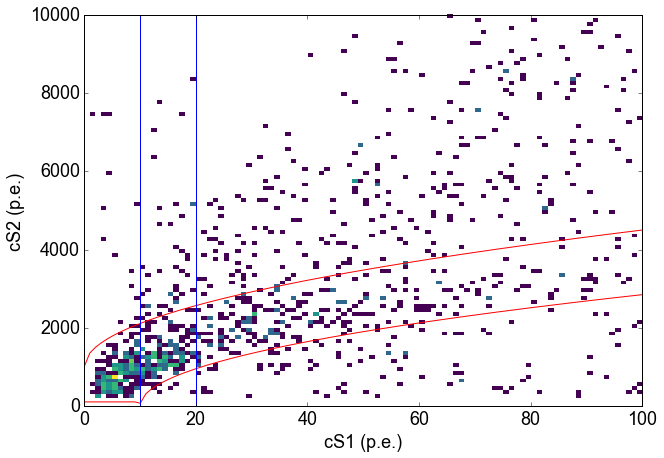

In [7]:
x.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 100), (0, 10e3)))
plt.plot(x_plot, nr_high(x_plot), color='red')
plt.plot(x_plot, nr_low(x_plot),  color='red')
plt.axvline(10)
plt.axvline(20)
plt.show()

In [8]:
slice_nr = cuts.range_selection(d_nr, 'cs1', (10, 20))

cs1 in [10, 20) selection: 524 rows removed (22.37% passed)


In [9]:
len(slice_nr)

151

In [10]:
pulse_list = []
for pulse, s1 in zip(slice_nr['s1_pulse'], slice_nr['s1']):
    pulse = np.array(pulse)
    pulse_list.append(1/s1*pulse)
pulse_list = np.array(pulse_list)    

In [11]:
avg_pulse =(np.average(pulse_list, axis=0))

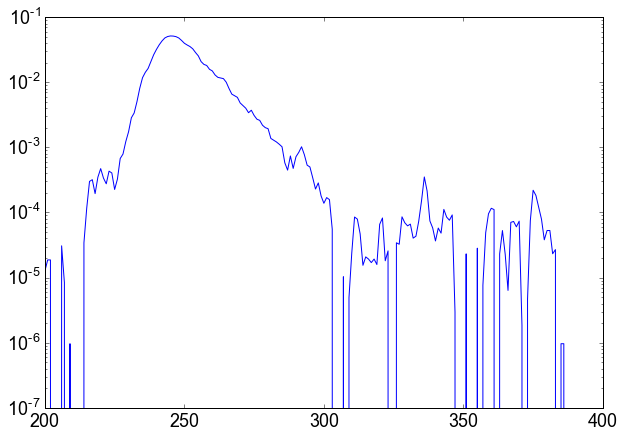

In [12]:
plt.plot(avg_pulse)
plt.xlim(200, 400)
plt.yscale('log')

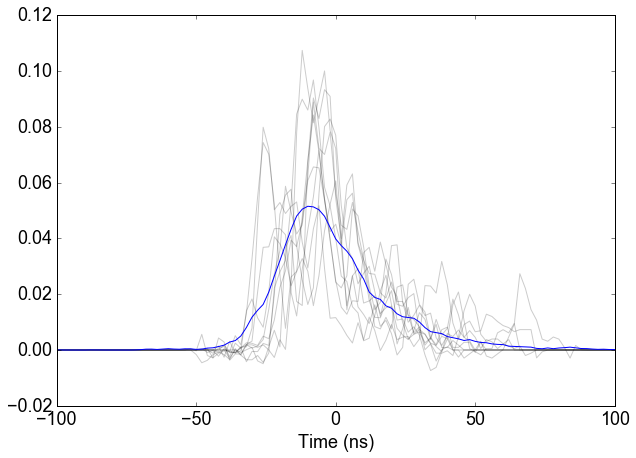

In [13]:
x_plot = np.linspace(-500, 500, 501)
for pulse, s1 in zip(slice_nr['s1_pulse'][:10], slice_nr['s1']):
    pulse = np.array(pulse)
    plt.plot(x_plot, 1/s1*pulse, color='black', alpha=0.2)
plt.plot(x_plot, avg_pulse)
plt.xlim(-100, 100)
plt.xlabel('Time (ns)')
plt.show()

#### ER

In [14]:
x  = XAMSAnalysis(run_names_bg[:1], processed_data_path_nr, minitree_path)
x.load(treemakers=['Basics', 'Fundamentals', S1Pulse])

x.corr_z(1.5, 1.73)
x.cut_interaction_exists()
x.cut_time_since_previous()
x.cut_fiducial_volume()
x.cut_s2_range_50p_area(pickle_file='../light_yield/data/cs137_s2_width.pickle')
x.cut_thresholds(s1_threshold=0, s2_threshold=200.)
x.cut_largest_other_s1()
x.cut_largest_other_s2() 
x.corr_s1_ly_poly(ly_filename='../light_yield/data/cs137_ly_p2_sel2.pickle')
x.corr_s2_electron_lifetime(pickle_file='../light_yield/data/cs137_electron_lifetime_sel2.pickle', verbose=True)
print('Events left: %.1f k' % (len(x.d)/1000))

Loaded 142319 (142.3 k) events.
Total live time: 1800.0 seconds (0.5 hours)
Finite s1 selection: 42540 rows removed (70.11% passed)
ms_since_previous_event above 1.0 selection: 18223 rows removed (81.74% passed)
z in [-9.5, -0.5) selection: 14904 rows removed (81.73% passed)
Cutoff at 251.5 ns
s2_width_difference below 251.5 selection: 2674 rows removed (95.99% passed)
s1 above 0 selection: 0 rows removed (100.00% passed)
s2 above 200.0 selection: 5063 rows removed (92.09% passed)
largest_other_s1 below 5 selection: 13276 rows removed (77.47% passed)
largest_other_s2 below 100.0 selection: 11632 rows removed (74.51% passed)
Using lifetime 810.658412
Events left: 34.0 k


In [15]:
# Function definitions
def er_low(s1):
    # Piecewise def
    return 50 * s1 + 0

def er_high(s1):
    return 85 * s1 + 2e3

x_plot = np.linspace(0, 200, 200)

In [16]:
d_er = x.d
# select below line
d_er = cuts.selection(d_er, d_er['cs2'] < er_high(d_er['cs1']), 'Below ER' )
d_er = cuts.selection(d_er, d_er['cs2'] > er_low(d_er['cs1']), 'Above ER' )
d_er = cuts.below(d_er, 'cs1', 200)

Below ER selection: 21081 rows removed (38.01% passed)
Above ER selection: 3631 rows removed (71.91% passed)
cs1 below 200 selection: 8058 rows removed (13.31% passed)


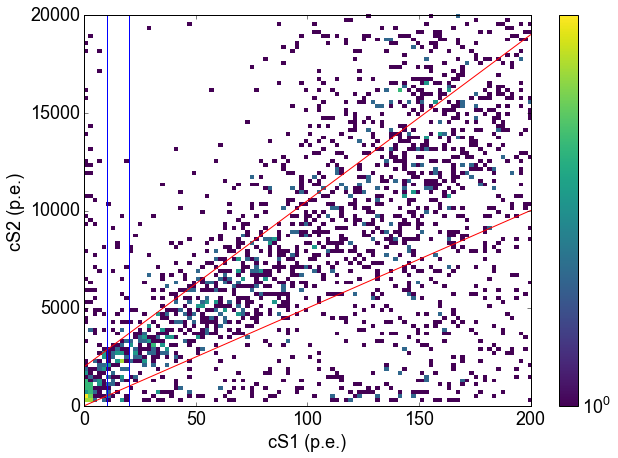

In [17]:
x.plot_cs1cs2(bins=100, norm=LogNorm(), range=((0, 200),(0, 20e3)))
plt.colorbar()
plt.plot(x_plot, er_high(x_plot), color='red')
plt.plot(x_plot, er_low(x_plot),  color='red')
plt.axvline(10)
plt.axvline(20)
plt.show()

In [18]:
slice_er = cuts.range_selection(d_er, 'cs1', (10, 20))

cs1 in [10, 20) selection: 1167 rows removed (5.66% passed)


In [19]:
len(slice_er)

70

In [44]:
def nonan(arr):
    '''
    My own since python keeps bugging me for lists.
    True for non-nans, false for nans (so you can use this as a selection to throw nans out)
    '''
    bool_arr = []
    for el in arr:
        # fucking lelijk maar none werkt echt niet mee ongelofelijk
        try:
            len(el)
            bool_arr.append(True)
        except:
            bool_arr.append(False)
    
    bool_arr = np.array(bool_arr)
    return bool_arr
            

In [47]:
slice_er = slice_er[nonan(slice_er['s1_pulse'].values)]

In [50]:
pulse_list_er = []
for pulse, s1 in zip(slice_er['s1_pulse'], slice_er['s1']):
    pulse = np.array(pulse)
    pulse_list_er.append(1/s1*pulse)
pulse_list_er = np.array(pulse_list_er)    
avg_pulse_er =(np.average(pulse_list_er, axis=0))

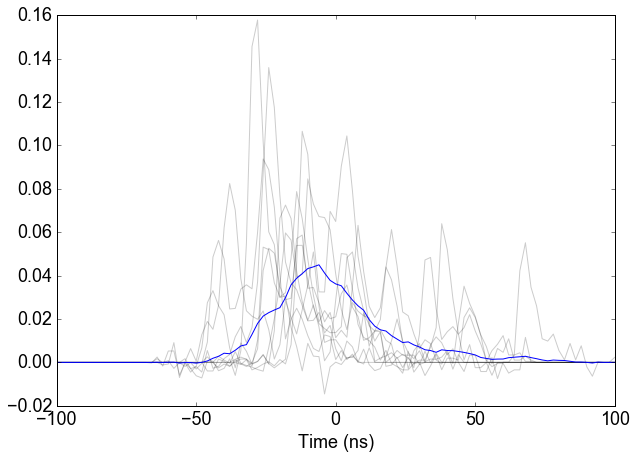

In [51]:
x_plot = np.linspace(-500, 500, 501)
for pulse, s1 in zip(slice_er['s1_pulse'][:10], slice_er['s1']):
    pulse = np.array(pulse)
    plt.plot(x_plot, 1/s1*pulse, color='black', alpha=0.2)
plt.plot(x_plot, avg_pulse_er)
plt.xlim(-100, 100)
plt.xlabel('Time (ns)')
plt.show()

### COMPARE!

0.999999998397
0.911878651492


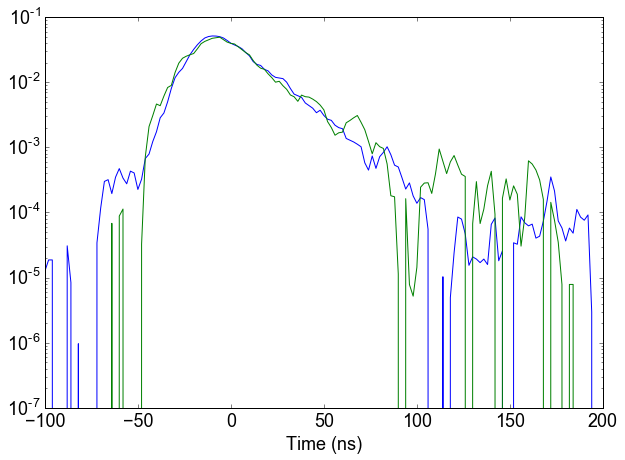

In [57]:
plt.plot(x_plot, avg_pulse)
plt.plot(x_plot, 1/0.911878651492 * avg_pulse_er)
plt.xlim(-100, 200)
plt.xlabel('Time (ns)')
print(sum(avg_pulse))
print(sum(avg_pulse_er))
plt.yscale('log')

### Some ideas...

  * I should really be remaking some minitrees. They might be outdated (see especially the S1 area!)
  * Use a preselection.
  * Get only the first part of the waveform (in the minitree step?)
  * Copy the files over?
  * Read only after selection on the other files.... ?